# NCSU GIS 582: Geospatial Modeling and Analysis

## Viewshed, solar energy potential analysis

### Outline:

- line of sight, viewshed and cumulative viewshed: principle and applications
- solar radiation: components and dynamics
- solar radiation in complex terrain, cast shadows
- cumulative solar irradiation, solar energy potential

### Lecture:
[Lecture slides: Viewsheds and solar radiation](https://ncsu-geoforall-lab.github.io/geospatial-modeling-course/lectures/viewshed_solar.html)

### Supplemental materials:
* [GRASS GIS overview and manual](http://grass.osgeo.org/grass74/manuals/index.html)
* [GRASS book](http://www.grassbook.org/)


* [Starek, M.J., et al., 2020, Viewshed simulation and optimization for digital terrain modelling with terrestrial laser scanning, International Journal of Re-mote Sensing, 41:16, 6409-6426](https://doi.org/10.1080/01431161.2020.1752952)
* [Tabrizian et al. 2020, High Resolution Viewscape Modeling Evaluated Through Immersive Virtual Environments. ISPRS Int. J. Geo-Inf. 9, 445.](https://doi.org/10.3390/ijgi9070445)
* [Viewshed Analysis](https://link.springer.com/chapter/10.1007/978-3-319-89303-7_9), and [Solar Radiation Dynamics](https://link-springer-com.prox.lib.ncsu.edu/chapter/10.1007/978-3-319-89303-7_11), chapters from Petrasova et al., 2018, Tangible Modeling with Open Source GIS. Second edition. Springer. [Available free through NCSU library](https://link-springer-com.prox.lib.ncsu.edu/book/10.1007/978-3-319-89303-7). or [through Springer](https://link.springer.com/book/10.1007%2F978-3-319-89303-7)
* [GIS solar data from NREL](https://www.nrel.gov/gis/data-solar.html)
* [Project Sunroof by Google, see Data explorer](https://www.google.com/get/sunroof#p=0)
* [PVWatts Calculator](https://pvwatts.nrel.gov/)
* [Solargis Website](https://solargis.com/)

## Getting Starting with Jupyter Notebooks

Each window in a Jupyter notebooks is called a `cell`. Each cell in the notebook can include different code that can be run using `Shift + Enter` or clicking the run button (play icon). In this notebook the cells include bash commands indicated by `%%bash` at the top of the cell, python, and markdown. 

The assignment is layed out so that you can run each cell in order to run GRASS GIS modules and visualize outputs with GRASS Jupyter (python). While you are working through the assignment you will see `questions` and `tasks` that you must respond to in the cell directly under the question or task indicated by **...Write your response here...** or **# Add your code here**. The question response cells are Markdown cells and the task response cells are bash cells where you can include and run your own GRASS commands.


## Start GRASS GIS

In [1]:
%%bash
grass -e -c ~/grassdata/nc_spm_08_grass7/HW_6_viewsheds

Creating new GRASS GIS mapset <HW_6_viewsheds>...


Create the `output` directory to save your maps.

In [4]:
%%bash
mkdir './output'

In [13]:
import subprocess
import sys
import os

# Ask GRASS GIS where its Python packages are.
# FOR WINDOWS:
# grass_call = "grass80"
# shell_setting = True
# FOR MAC/LINUX
grass_call = "grass"
shell_setting = False

sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=shell_setting).strip()
)

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
gj.init("~/grassdata/nc_spm_08_grass7/HW_6_viewsheds")
os.chdir('6 - Viewshed, solar energy potential analysis')


## Viewshed analysis

Compute viewshed from a new 32 story tower located in downtown.

In [14]:
%%bash

g.region raster=elev_ned_30m -ap
v.in.ascii -z input='./inputs/viewshed_points.txt' output=viewpoints separator=, z=3
r.viewshed elev_ned_30m output=tower_165_los coordinates=642212,224767 observer_elevation=165 max_distance=10000

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000


Scanning input for column types...
Number of columns: 3
Number of data rows: 2
Importing points...
   0  50 100
Building topology for vector map <viewpoints@HW_6_viewsheds>...
Registering primitives...
Computing events...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Computing visibility...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Writing output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100


Display result on shaded relief:

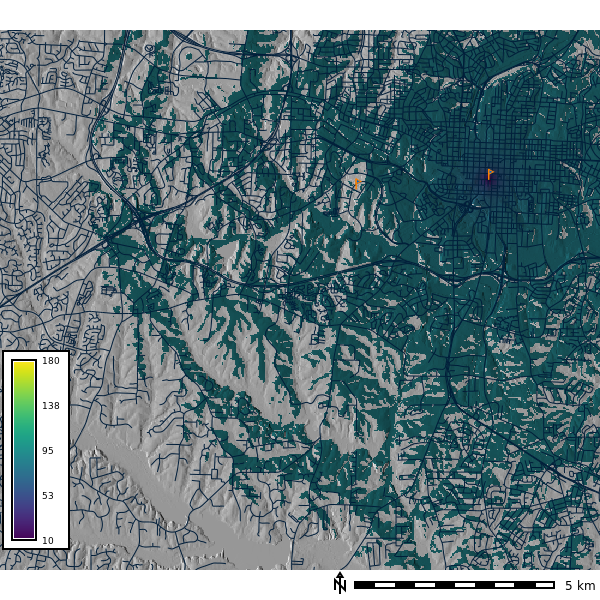

In [16]:
# Create Map instance
towerview_angle_map = gj.Map(height=600, width=600, filename="./output/towerview_angle.png")
# Add the elevation raster to the map
towerview_angle_map.d_his(hue="tower_165_los", intensity="elevation_shade")
towerview_angle_map.d_vect(map="streets_wake")
towerview_angle_map.d_vect(map="viewpoints", size=10, color="orange", icon="basic/marker")
towerview_angle_map.d_legend(raster="tower_165_los", at=[10,40,2,6], flags="b")
towerview_angle_map.d_barscale(at=[55,5], flags="n")

# Display map
towerview_angle_map.show()

Find out what is the landuse within the view using map algebra:

In [17]:
%%bash
r.mapcalc "tower_los_lu30m = if(tower_165_los,landclass96,null())"
r.colors tower_los_lu30m raster=landclass96
r.category tower_los_lu30m raster=landclass96
r.report -n tower_los_lu30m unit=p,h

Color table for raster map <tower_los_lu30m> set to 'landclass96'
Category table for <tower_los_lu30m> set from <landclass96>
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Mon Mar  4 16:26:42 2024|
|-----------------------------------------------------------------------------|
|          north: 228500    east: 645000                                      |
|REGION    south: 215000    west: 630000                                      |
|          res:       30    res:      30                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: South-West Wake county: Simplified landuse classes (tower_los_lu30m in H|
|-----------------------------------------------------------------------------|
|                   Category Information

Display only the following layers and save result:

#### Viewscape map

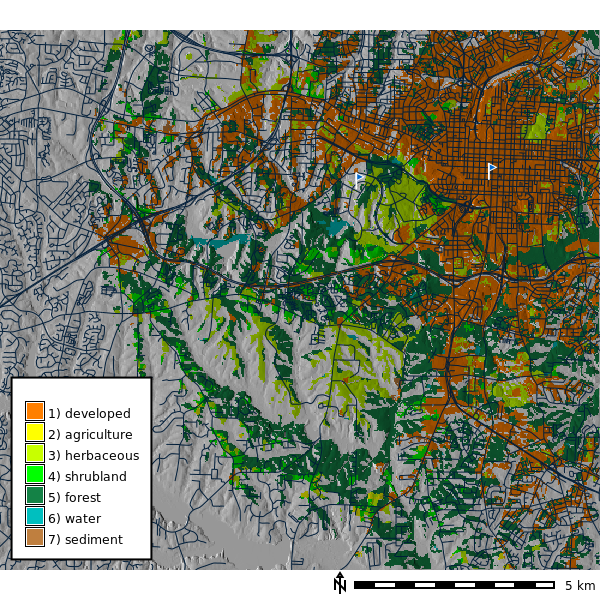

In [30]:
# Create Map instance
tower_los_lu30m_map = gj.Map(height=600, width=600, filename="./output/towerviewlu.png")
# Add the elevation raster to the map
tower_los_lu30m_map.d_his(hue="tower_los_lu30m", intensity="elevation_shade")
tower_los_lu30m_map.d_vect(map="streets_wake")
tower_los_lu30m_map.d_vect(map="viewpoints", size=16, color="white", icon="basic/marker")
tower_los_lu30m_map.d_legend(raster="tower_los_lu30m", at=[6,35,4,8], flags="b")
tower_los_lu30m_map.d_barscale(at=[55,5], flags="n")

# Display map
tower_los_lu30m_map.show()

We can also do visibility from former RedHat headquarters:

In [21]:
%%bash
r.viewshed elev_ned_30m output=redhat_25_los coordinates=638898,224528 observer_elevation=25 max_distance=10000

Computing events...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Computing visibility...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Writing output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100


#### RedHat HQ Viewshed

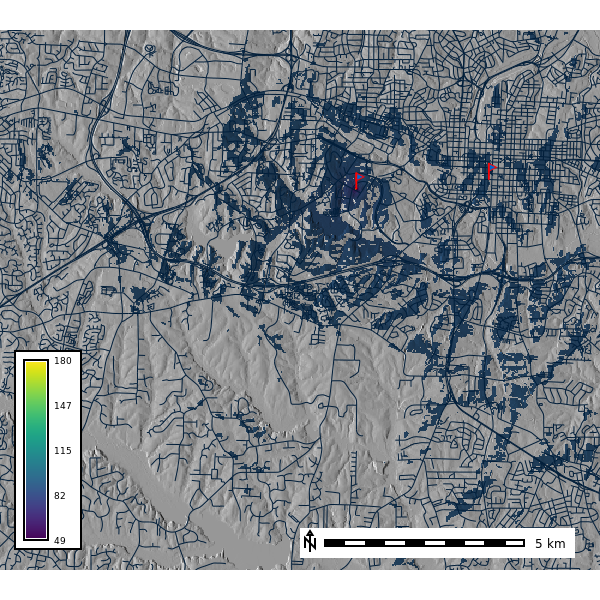

In [27]:
# Create Map instance
RHview_map = gj.Map(height=600, width=600, filename="./output/RHview.png")
# Add the elevation raster to the map
RHview_map.d_his(hue="redhat_25_los", intensity="elevation_shade")
RHview_map.d_vect(map="streets_wake")
RHview_map.d_vect(map="viewpoints", size=16, color="red", icon="basic/marker")
RHview_map.d_legend(raster="redhat_25_los", at=[10,40,4,8], flags="b")
RHview_map.d_barscale(at=[50,12], flags="n")

# Display map
RHview_map.show()

### Tasks

<div class="alert alert-block alert-info">

#### Task 1 part A: Use mapalgebra to compute landuse in the view, assign the visible land use map land use colors and category labels using [r.colors](https://grass.osgeo.org/grass76/manuals/r.colors.html) and [r.category](https://grass.osgeo.org/grass76/manuals/r.category.html).

In [ ]:
%%bash
# Add your code here
# Original expression: r.mapcalc "streams_der_30m = if(abs(accum_10K) > 100, 1, null())"

<div class="alert alert-block alert-info">

#### Task 1 part B: Use r.report -n to compare the size and land use composition within viewshed from the RBC tower and RH headquarters.

In [ ]:
%%bash
# Add your code here
# Original expression: r.mapcalc "streams_der_30m = if(abs(accum_10K) > 100, 1, null())"

...Write about your comparison here...

## Solar radiation analysis

Set the region and add the planned building to the DEM, we will use this new DEM for the analyses.

In [31]:
%%bash
g.region rural_1m -p
r.mapcalc "elevfacility_1m = if(isnull(facility), elev_lid792_1m,138.)"
r.colors elevfacility_1m color=elevation

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      1
ewres:      1
rows:       750
cols:       700
cells:      525000


Color table for raster map <elevfacility_1m> set to 'elevation'


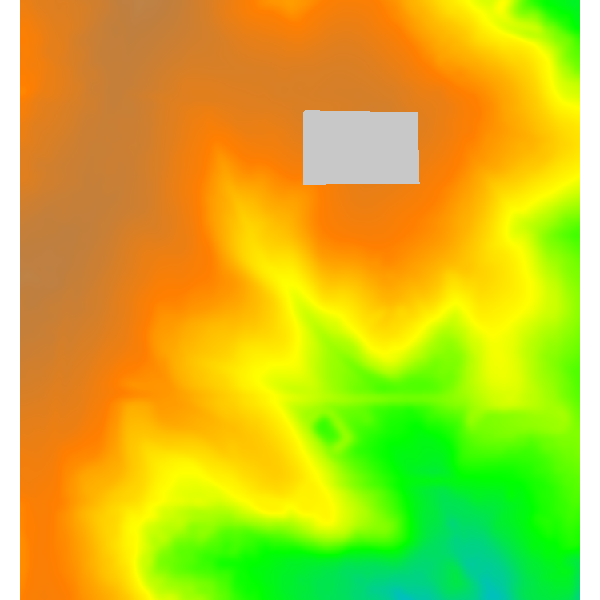

In [32]:
# Create Map instance
elevfacility_1m_map = gj.Map(height=600, width=600, filename="./output/elevfacility_1m.png")

# Add the elevfacility_1m raster to the map
elevfacility_1m_map.d_rast(map="elevfacility_1m")

# Display map
elevfacility_1m_map.show()

Prepare input maps (slope and aspect):

In [33]:
%%bash
r.slope.aspect elevation=elevfacility_1m aspect=aspect_elevfac_1m slope=slope_elevfac_1m

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Aspect raster map <aspect_elevfac_1m> complete
Slope raster map <slope_elevfac_1m> complete


### Incidence angles and cast shadows

Compute the sun position on Dec. 22 at 2:25pm, EST (no map output expected):

In [34]:
%%bash
r.sunmask -s elevation=elevfacility_1m year=2001 month=12 day=22 hour=14 minute=25 sec=0 timezone=-5

Using map center coordinates: 638650.000000 220375.000000
Calculating sun position... (using solpos (V. 11 April 2001) from NREL)


2001/12/22, daynum: 356, time: 14:25:00 (decimal time: 14.416667)
long: -78.678856, lat: 35.736160, timezone: -5.000000
Solar position: sun azimuth: 212.793503, sun angle above horz. (refraction corrected): 23.192465
Sunrise time (without refraction): 07:26:30
Sunset time  (without refraction): 17:00:28


Calculate incidence angles including cast shadows.

<div class="alert alert-block alert-info">

#### Question 1: We assign histogram equalized color table - can you explain why? (hint: try the same color table without -e).

...Write about your comparison here...

<div class="alert alert-block alert-info">

#### Question 2: What is the value on the roof? How is it related to day/time?.

...Write about your comparison here...

In [36]:
%%bash
r.sun elevation=elevfacility_1m aspect=aspect_elevfac_1m slope=slope_elevfac_1m incidout=incid_elevfac_1m day=356 time=14.416667
r.info incid_elevfac_1m
r.colors -e incid_elevfac_1m co=bcyr

Number of threads <1>
Mode 1: instantaneous solar incidence angle & irradiance using a set local
time
Using Linke constant: 3.000000
Using albedo constant: 0.200000
Using slope map <slope_elevfac_1m>
Using aspect map <aspect_elevfac_1m>
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


 +----------------------------------------------------------------------------+
 | Map:      incid_elevfac_1m               Date: Mon Mar  4 16:45:23 2024    |
 | Mapset:   HW_6_viewsheds                 Login of Creator: coreywhite      |
 | Location: nc_spm_08_grass7                                                 |
 | DataBase: /home/coreywhite/grassdata                                       |
 | Title:                                                                     |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    FCELL                Semantic label: (none)                |
 |   Rows:         750                                                        |
 |   Columns:      700                  

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <incid_elevfac_1m> set to 'bcyr'


#### Incidence angle raster map

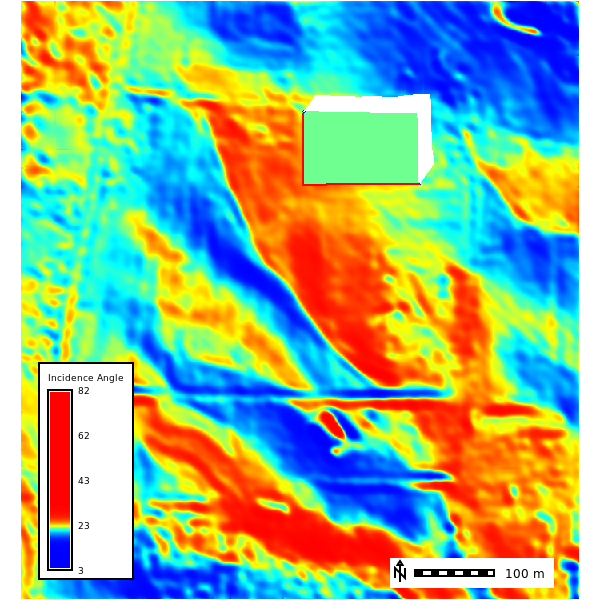

In [72]:
# Create Map instance
incid_angle_map = gj.Map(height=600, width=600, filename="./output/incid_angle.png")
# Add the elevation raster to the map
incid_angle_map.d_rast(map="incid_elevfac_1m")
incid_angle_map.d_legend(raster="incid_elevfac_1m", at=[5,35,8,12], flags="b", title="Incidence Angle")
incid_angle_map.d_barscale(at=[65,7], flags="n")

# Display map
incid_angle_map.show()

Extract the cast shadow area for 14.4 hr and compute and extract shadow area for 7.5 hr:

In [47]:
%%bash
r.mapcalc "shadow_1m = if(isnull(incid_elevfac_1m), 1, null())"
r.colors shadow_1m color=grey

Color table for raster map <shadow_1m> set to 'grey'


#### Shadow raster map 1

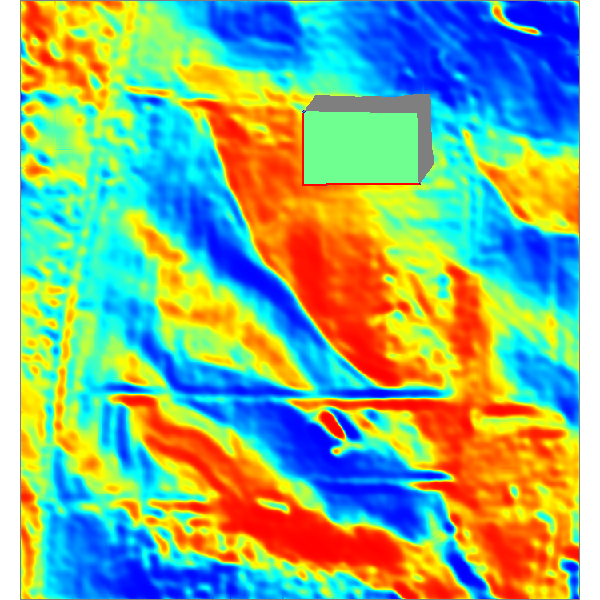

In [48]:
# Create Map instance
shadow_1m_map = gj.Map(height=600, width=600)
# Add the elevation raster to the map
shadow_1m_map.d_rast(map="incid_elevfac_1m")
shadow_1m_map.d_rast(map="shadow_1m")

# Display map
shadow_1m_map.show()

In [49]:
%%bash
r.sun elevation=elevfacility_1m aspect=aspect_elevfac_1m slope=slope_elevfac_1m incidout=incid_elevfac7_1m day=356 time=7.50
r.mapcalc "shadow7_1m = if(isnull(incid_elevfac7_1m), 1, null())"

Number of threads <1>
Mode 1: instantaneous solar incidence angle & irradiance using a set local
time
Using Linke constant: 3.000000
Using albedo constant: 0.200000
Using slope map <slope_elevfac_1m>
Using aspect map <aspect_elevfac_1m>
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


#### Shadow raster map 2

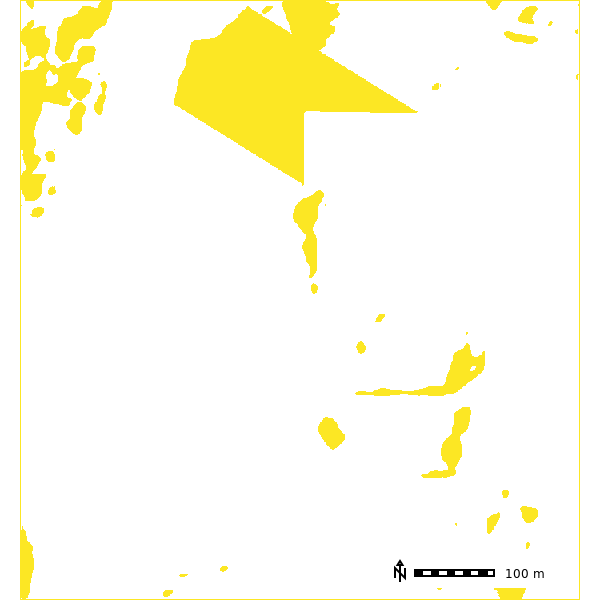

In [52]:
# Create Map instance
shadows_map = gj.Map(height=600, width=600, filename="./output/shadows.png")
# Add the elevation raster to the map
shadows_map.d_rast(map="shadow7_1m")
shadows_map.d_barscale(at=[65,7], flags="n")

# Display map
shadows_map.show()

### Solar radiation

Compute global (beam+diffuse+refl) radiation for entire day during summer and winter solstice.\
Display the radiation maps and also insolation time maps insol_time using same commands.\
Optionally display the radiation maps draped over elevation elevfacility_1m in 3D view to see relation between terrain geometry and solar radiation.

In [53]:
%%bash
r.sun elevation=elevfacility_1m aspect=aspect_elevfac_1m slope=slope_elevfac_1m day=356 glob_rad=g356 insol_time=its356
r.colors g356 co=gyr -e
r.sun elevation=elevfacility_1m aspect=aspect_elevfac_1m slope=slope_elevfac_1m day=172 glob_rad=g172 insol_time=its172
r.colors g172 co=gyr -e

Number of threads <1>
Mode 2: integrated daily irradiation for a given day of the year
Using Linke constant: 3.000000
Using albedo constant: 0.200000
Using slope map <slope_elevfac_1m>
Using aspect map <aspect_elevfac_1m>
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <g356> set to 'gyr'
Number of threads <1>
Mode 2: integrated daily irradiation for a given day of the year
Using Linke constant: 3.000000
Using albedo constant: 0.200000
Using slope map <slope_elevfac_1m>
Using aspect map <aspect_elevfac_1m>
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  

#### Solar Winter raster map [Wh.m-2.day-1]

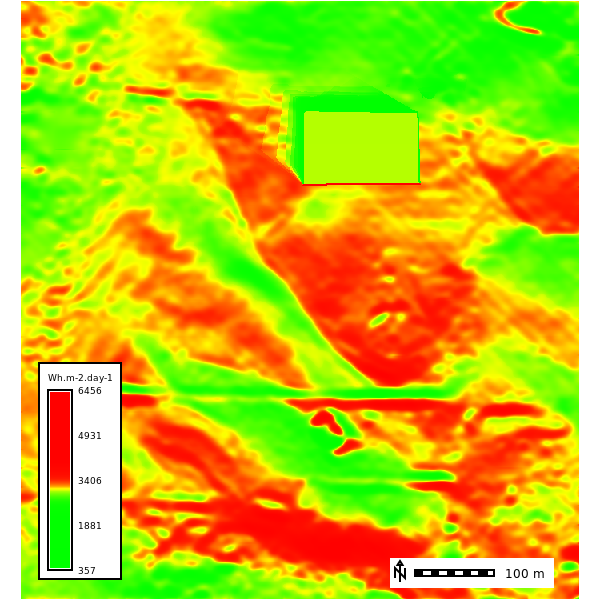

In [71]:
# Create Map instance
solar_winter_map = gj.Map(height=600, width=600, filename="./output/solar_winter.png")
# Add the elevation raster to the map
solar_winter_map.d_rast(map="g356")
solar_winter_map.d_barscale(at=[65,7], flags="n")
solar_winter_map.d_legend(raster="g356", at=[5,35,8,12], flags="b", title="Wh.m-2.day-1")

# Display map
solar_winter_map.show()

#### Solar Summer raster map [Wh.m-2.day-1]

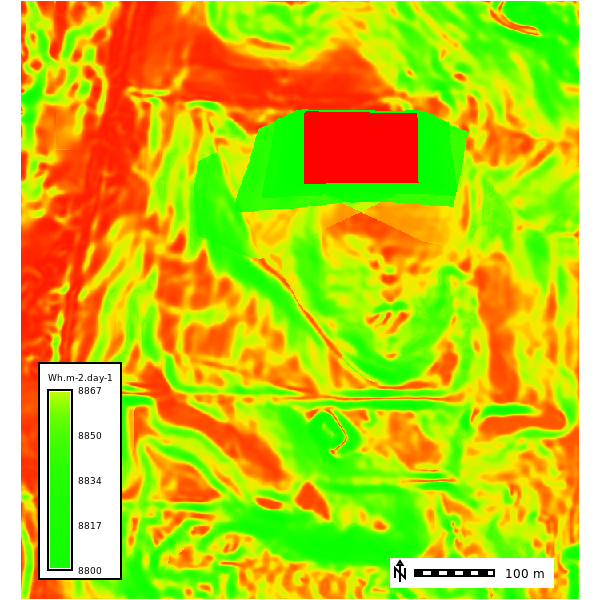

In [73]:
# Create Map instance
solar_summer_map = gj.Map(height=600, width=600, filename="./output/solar_summer.png")
# Add the elevation raster to the map
solar_summer_map.d_rast(map="g172")
solar_summer_map.d_barscale(at=[65,7], flags="n")
solar_summer_map.d_legend(raster="g172", at=[5,35,8,12], range="8800,8867", flags="b", title="Wh.m-2.day-1")

# Display map
solar_summer_map.show()

Calculate direct solar radiation and insolation time for a larger region.

In [57]:
%%bash
g.region raster=elev_ned_30m -p
r.slope.aspect elevation=elev_ned_30m aspect=asp_ned_30m slope=slp_ned_30m
r.sun elevation=elev_ned_30m aspect=asp_ned_30m slope=slp_ned_30m linke_value=2.5 albedo_value=0.2 beam_rad=b356 diff_rad=d356 refl_rad=r356 insol_time=it356 day=356

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000


   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Aspect raster map <asp_ned_30m> complete
Slope raster map <slp_ned_30m> complete
Number of threads <1>
Mode 2: integrated daily irradiation for a given day of the year
Using Linke constant: 2.500000
Using albedo constant: 0.200000
Using slope map <slp_ned_30m>
Using aspect map <asp_ned_30m>
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


<div class="alert alert-block alert-info">

#### Task 2: Try to find good color tables (custom, hist. equalized, to see the pattern).

Modify the following maps to complete **task 2**.

#### Irradiation raster map [Wh.m-2.day-1]

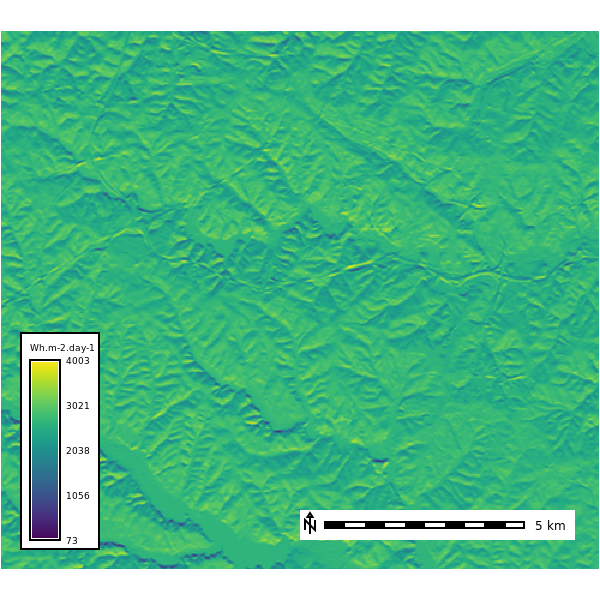

In [69]:
# Create Map instance
beamrad356_map = gj.Map(height=600, width=600, filename="./output/beamrad356.png")
# Add the elevation raster to the map
beamrad356_map.d_rast(map="b356")
beamrad356_map.d_barscale(at=[50,15], flags="n")
beamrad356_map.d_legend(raster="b356", at=[10,40,5,10], flags="b", title="Wh.m-2.day-1")

# Display map
beamrad356_map.show()

#### Insolation time raster map [h]

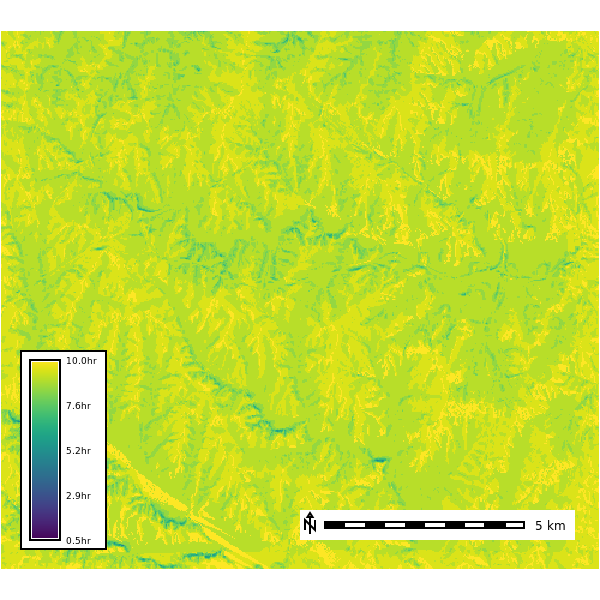

In [67]:
# Create Map instance
insol_time_map = gj.Map(height=600, width=600, filename="./output/insol_time.png")
# Add the elevation raster to the map
insol_time_map.d_rast(map="it356")
insol_time_map.d_barscale(at=[50,15], flags="n")
insol_time_map.d_legend(raster="it356", at=[10,40,5,10], flags="b", unit="hr")

# Display map
insol_time_map.show()